In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from mcmc_samplers import SGHMCSampler,LossModule
from ResForkNet import *
import utils as ut
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from collections import OrderedDict
import matplotlib.pyplot as plt
import hiddenlayer as hl
from IPython.display import display, clear_output
torch.manual_seed(0)
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(device)

plt.style.use('ggplot')

TypeError: _resolve_type_from_object(): incompatible function arguments. The following argument types are supported:
    1. (arg0: object, arg1: torch._C._jit_tree_views.SourceRange, arg2: Callable[[str], function]) -> torch._C.Type

Invoked with: typing.Union[int, NoneType], None, <function try_ann_to_type.<locals>.fake_rcb at 0x7f6905d4cd08>

In [ ]:
def SimpleTrade(predictions, prices, model, path_to_model = None, horizon = 'week', budget = 1000):
    portfolio = {}
    model.load_state_dict(torch.load(path_to_model,map_location = torch.device(device)))
    model = model.to(device)
    
    
    
    

In [2]:
stocks = ['AAPL','AMZN','GOOGL','HPQ','INTC','MSFT','NTAP','NVDA','SPY','T','XRX']
transform = ut.ToTensor()
dataset = ut.TechnicalPortfolioTimeSeries(components = stocks, window = 30, pred_window = 30,transform = transform)
loader = DataLoader(dataset, batch_size=len(dataset),shuffle=False, num_workers=0)
model = ResForkNet(n_dependents = len(stocks), num_inputs = 60, timesteps = 30, num_channels = [128]*2, ll_sizes=[10,100,64])
model.load_state_dict(torch.load('ReducedMonth/model_reduced_month8',map_location = torch.device(device)))

window = 30
pred_window = 30
num_f = 60
trains = []
for i in range(len(dataset.merged_df)-window-pred_window, len(dataset.merged_df)-window):
    stack = []
    for j in range(0,len(dataset.merged_df.columns), num_f):
        stack.append(np.transpose(dataset.norm_df[i:window+i, j:j+num_f]))

    stack = np.concatenate(stack, axis = 1)
    trains.append(stack)
new_data = np.array(trains)

with torch.no_grad():
    test_data,test_labels,index = next(iter(loader))
    test_data = torch.cat([test_data, torch.Tensor(new_data).type(torch.FloatTensor).to(device)], axis = 0)
    predictions = model(test_data)

(3842, 3)
(3842, 60, 330) (3842, 11)
torch.Size([1, 3840])


RuntimeError: version_ <= kMaxSupportedFileFormatVersion INTERNAL ASSERT FAILED at /pytorch/caffe2/serialize/inline_container.cc:132, please report a bug to PyTorch. Attempted to read a PyTorch file with version 3, but the maximum supported version for reading is 2. Your PyTorch installation may be too old. (init at /pytorch/caffe2/serialize/inline_container.cc:132)
frame #0: c10::Error::Error(c10::SourceLocation, std::string const&) + 0x33 (0x7f96c71c2193 in /mnt/workspace/.local/lib/python3.5/site-packages/torch/lib/libc10.so)
frame #1: caffe2::serialize::PyTorchStreamReader::init() + 0x1f5b (0x7f96ca34a9eb in /mnt/workspace/.local/lib/python3.5/site-packages/torch/lib/libtorch.so)
frame #2: caffe2::serialize::PyTorchStreamReader::PyTorchStreamReader(std::string const&) + 0x64 (0x7f96ca34bc04 in /mnt/workspace/.local/lib/python3.5/site-packages/torch/lib/libtorch.so)
frame #3: <unknown function> + 0x6c5466 (0x7f971227b466 in /mnt/workspace/.local/lib/python3.5/site-packages/torch/lib/libtorch_python.so)
frame #4: <unknown function> + 0x2961c4 (0x7f9711e4c1c4 in /mnt/workspace/.local/lib/python3.5/site-packages/torch/lib/libtorch_python.so)
frame #5: PyCFunction_Call + 0x77 (0x4ea137 in /usr/bin/python3)
frame #6: PyObject_Call + 0x47 (0x5c20e7 in /usr/bin/python3)
frame #7: /usr/bin/python3() [0x4fbfce]
frame #8: PyObject_Call + 0x47 (0x5c20e7 in /usr/bin/python3)
frame #9: /usr/bin/python3() [0x574c19]
frame #10: /usr/bin/python3() [0x57f58c]
frame #11: PyObject_Call + 0x47 (0x5c20e7 in /usr/bin/python3)
frame #12: PyEval_EvalFrameEx + 0x4ed6 (0x53b656 in /usr/bin/python3)
frame #13: PyEval_EvalCodeEx + 0x87a (0x54124a in /usr/bin/python3)
frame #14: /usr/bin/python3() [0x4ec2e3]
frame #15: PyObject_Call + 0x47 (0x5c20e7 in /usr/bin/python3)
frame #16: /usr/bin/python3() [0x4fbfce]
frame #17: PyObject_Call + 0x47 (0x5c20e7 in /usr/bin/python3)
frame #18: /usr/bin/python3() [0x574c19]
frame #19: /usr/bin/python3() [0x57f58c]
frame #20: PyObject_Call + 0x47 (0x5c20e7 in /usr/bin/python3)
frame #21: PyEval_EvalFrameEx + 0x4ed6 (0x53b656 in /usr/bin/python3)
frame #22: /usr/bin/python3() [0x53fc97]
frame #23: PyEval_EvalFrameEx + 0x50bf (0x53b83f in /usr/bin/python3)
frame #24: /usr/bin/python3() [0x53fc97]
frame #25: PyEval_EvalCode + 0x1f (0x5409bf in /usr/bin/python3)
frame #26: /usr/bin/python3() [0x54a435]
frame #27: PyCFunction_Call + 0x4f (0x4ea10f in /usr/bin/python3)
frame #28: PyEval_EvalFrameEx + 0x614 (0x536d94 in /usr/bin/python3)
frame #29: _PyGen_Send + 0x133 (0x4eddc3 in /usr/bin/python3)
frame #30: PyEval_EvalFrameEx + 0x5d45 (0x53c4c5 in /usr/bin/python3)
frame #31: _PyGen_Send + 0x133 (0x4eddc3 in /usr/bin/python3)
frame #32: PyEval_EvalFrameEx + 0x5d45 (0x53c4c5 in /usr/bin/python3)
frame #33: _PyGen_Send + 0x133 (0x4eddc3 in /usr/bin/python3)
frame #34: PyEval_EvalFrameEx + 0x4d06 (0x53b486 in /usr/bin/python3)
frame #35: PyEval_EvalFrameEx + 0x4b14 (0x53b294 in /usr/bin/python3)
frame #36: PyEval_EvalFrameEx + 0x4b14 (0x53b294 in /usr/bin/python3)
frame #37: PyEval_EvalCodeEx + 0x13b (0x540b0b in /usr/bin/python3)
frame #38: /usr/bin/python3() [0x4ec3f7]
frame #39: PyObject_Call + 0x47 (0x5c20e7 in /usr/bin/python3)
frame #40: PyEval_EvalFrameEx + 0x252b (0x538cab in /usr/bin/python3)
frame #41: /usr/bin/python3() [0x5401ef]
frame #42: PyEval_EvalFrameEx + 0x5513 (0x53bc93 in /usr/bin/python3)
frame #43: /usr/bin/python3() [0x54307f]
frame #44: PyCFunction_Call + 0x4f (0x4ea10f in /usr/bin/python3)
frame #45: PyEval_EvalFrameEx + 0x614 (0x536d94 in /usr/bin/python3)
frame #46: /usr/bin/python3() [0x5401ef]
frame #47: PyEval_EvalFrameEx + 0x5513 (0x53bc93 in /usr/bin/python3)
frame #48: /usr/bin/python3() [0x54307f]
frame #49: PyCFunction_Call + 0x4f (0x4ea10f in /usr/bin/python3)
frame #50: PyEval_EvalFrameEx + 0x614 (0x536d94 in /usr/bin/python3)
frame #51: /usr/bin/python3() [0x5401ef]
frame #52: PyEval_EvalFrameEx + 0x5513 (0x53bc93 in /usr/bin/python3)
frame #53: /usr/bin/python3() [0x54307f]
frame #54: PyCFunction_Call + 0x4f (0x4ea10f in /usr/bin/python3)
frame #55: PyEval_EvalFrameEx + 0x614 (0x536d94 in /usr/bin/python3)
frame #56: PyEval_EvalCodeEx + 0x87a (0x54124a in /usr/bin/python3)
frame #57: /usr/bin/python3() [0x4ec2e3]
frame #58: PyObject_Call + 0x47 (0x5c20e7 in /usr/bin/python3)
frame #59: PyEval_EvalFrameEx + 0x252b (0x538cab in /usr/bin/python3)
frame #60: _PyGen_Send + 0x99 (0x4edd29 in /usr/bin/python3)
frame #61: PyEval_EvalFrameEx + 0x4d06 (0x53b486 in /usr/bin/python3)
frame #62: PyEval_EvalFrameEx + 0x4b14 (0x53b294 in /usr/bin/python3)
frame #63: PyEval_EvalCodeEx + 0x87a (0x54124a in /usr/bin/python3)


torch.Size([3844, 11]) torch.Size([3814, 11])


/mnt/workspace/.local/lib/python3.5/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


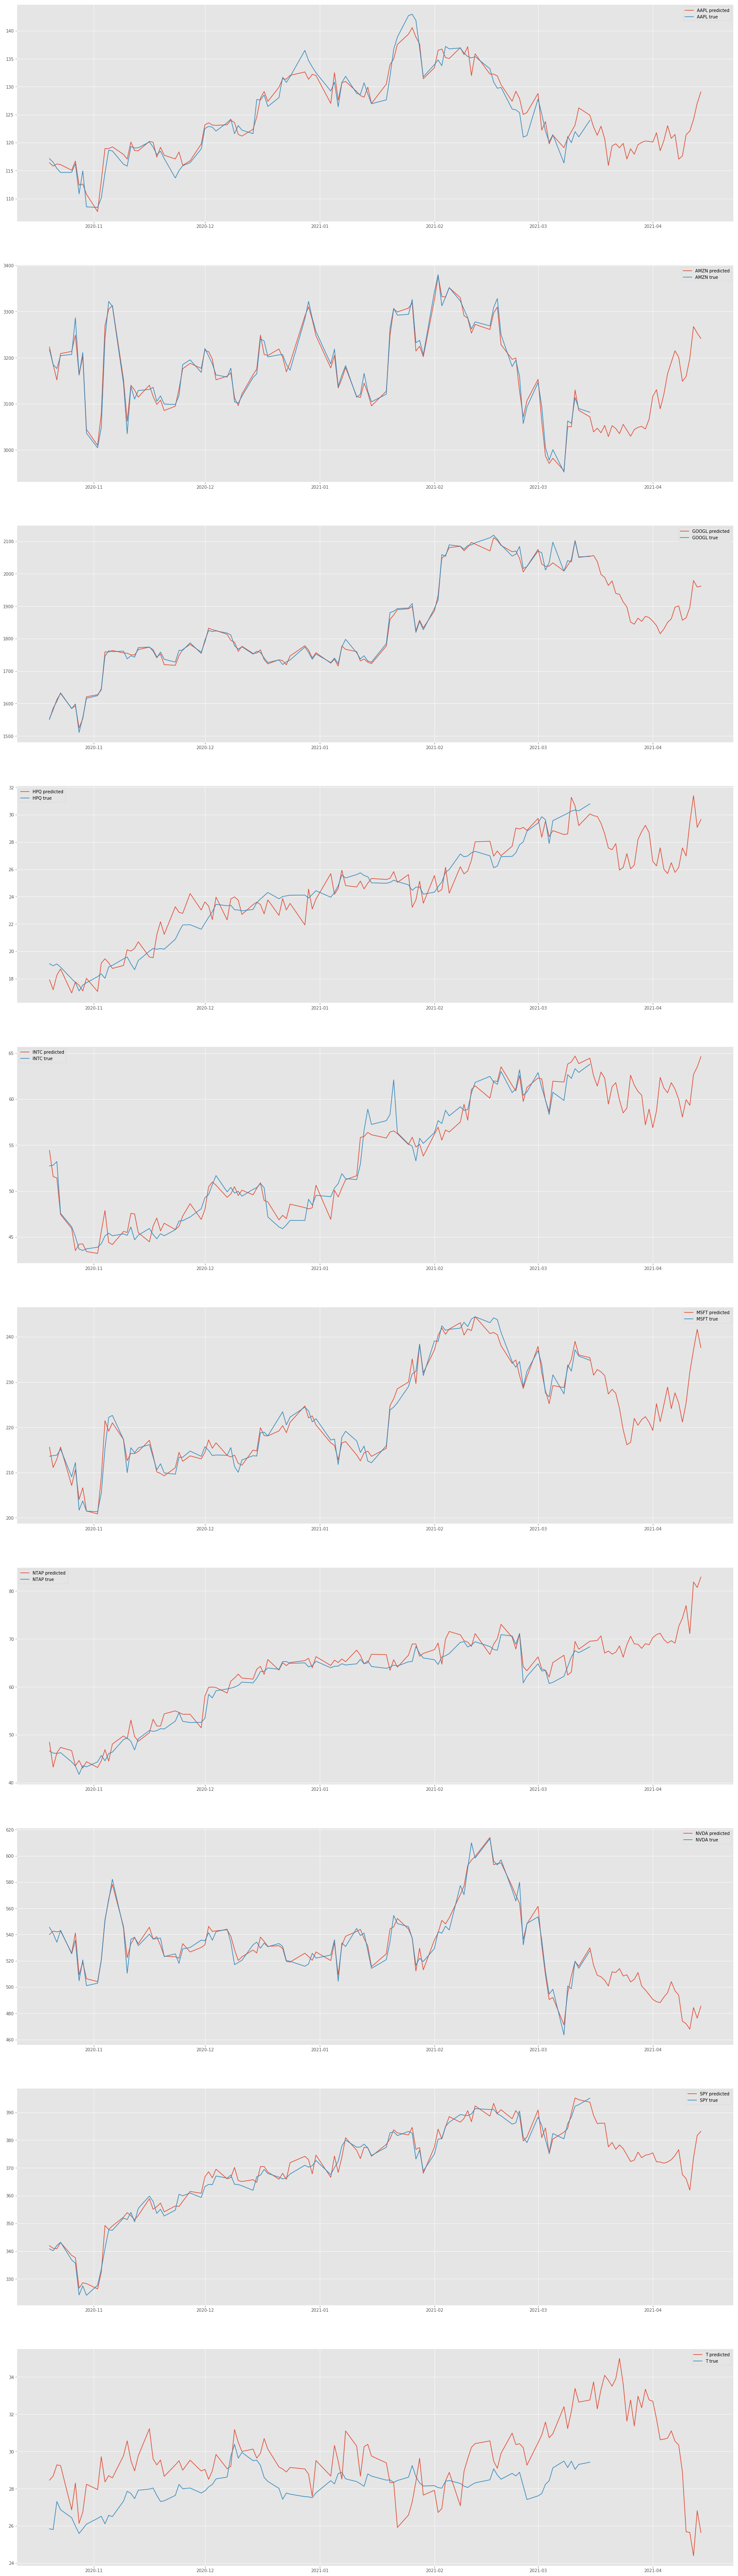

In [3]:
import datetime
print(predictions.shape, test_labels.shape)
index_true = [datetime.datetime(index[i,2],index[i,1],index[i,0]) for i in range(index.shape[0])]
index_pred = index_true + [index_true[-1] + datetime.timedelta(days=i) for i in range(1,31)]
fig, axs = plt.subplots(10,1, figsize=(30,110))
for i,ax in enumerate(axs):
    ax.plot(index_pred[-130:],predictions[-130:,i],
            label = stocks[i]+" predicted")
    ax.plot(index_true[-100:],test_labels[-100:,i],
            label = stocks[i]+" true")
    ax.legend()
plt.show()